In [1]:
import sys
dirname = '/Users/muhammaddaffarobani/Documents/personal_research/smt'
if dirname not in sys.path:
    sys.path.append(dirname)

import pandas as pd
import numpy as np
from smt.surrogate_models import KRG
from smt.problems import WingWeight
from smt.sampling_methods import LHS
from sklearn.metrics import mean_squared_error


from smt.explainability_tools import PartialDependenceDisplay, PDFeatureImportanceDisplay, PDFeatureInteractionDisplay


# Creating the model

In [2]:
ndoe = 300 
fun = WingWeight()
sampling = LHS(xlimits=fun.xlimits, criterion='ese', random_state=1)
X = sampling(ndoe)
y = fun(X)

n_train = int(0.8 * ndoe)

X_tr, y_tr = X[:n_train, :], y[:n_train]
X_te, y_te = X[n_train:, :], y[n_train:]

## config
feature_names = [
    r'$S_{w}$', r'$W_{fw}$', r'$A$', r'$\Delta$', 
    r'$q$', r'$\lambda$', r'$t_{c}$', r'$N_{z}$', 
    r'$W_{dg}$', r'$W_{p}$',
]

# X_tr = pd.read_csv('../../X_tr_wing_weight.csv')
# X_te = pd.read_csv('../../X_te_wing_weight.csv')
# y_tr = pd.read_csv('../../y_tr_wing_weight.csv')
# y_te = pd.read_csv('../../y_te_wing_weight.csv')
# X_tr = np.array(X_tr)
# X_te = np.array(X_te)
# y_tr = np.array(y_tr)
# y_te = np.array(y_te)

In [3]:
%%time
kriging_model = KRG(
    theta0=[1e-2]*X_tr.shape[1],
    print_prediction = False
    )
kriging_model.set_training_values(
    X_tr, 
    y_tr
    )

kriging_model.train()
y_pred = kriging_model.predict_values(X_te)
rmse = mean_squared_error(y_te, y_pred, squared=False)
print(f"RMSE: {rmse:.4f}")


___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 240
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  7.1433861
RMSE: 0.1650
CPU times: user 28.1 s, sys: 19.2 s, total: 47.4 s
Wall time: 7.18 s


# Partial dependence plot

## Feature Importance

Using `PDFeatureImportanceDisplay.from_surrogate_model` method
- Required parameters:
    - model: surrogate model. 
    - X: input spaces as a reference to create the partial dependence plot. 

- Config parameters:
    - feature_names: name of the features for the axis. 
    - sorted: if True, sort the features based on the feature importance. 

CPU times: user 46.3 s, sys: 19.7 s, total: 1min 5s
Wall time: 9.72 s


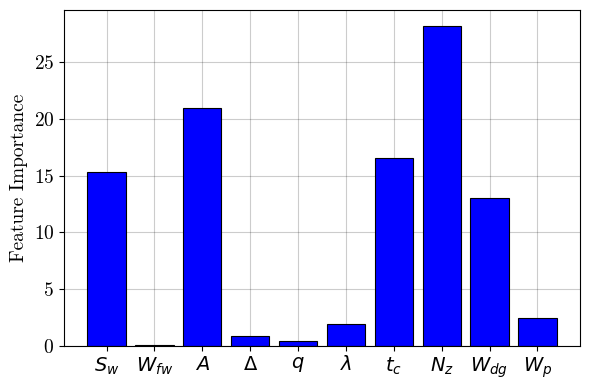

In [4]:
%%time
model = kriging_model

feature_importance = PDFeatureImportanceDisplay.from_surrogate_model(
    model, 
    X_tr, 
    feature_names=feature_names
)

## Feature interaction

### Overall interaction

Using `PDFeatureInteractionDisplay.overall_interaction` method. 
- Required parameters:
    - model: surrogate model.
    - X: input spaces as a reference to compute the interaction. 

- Config parameters:
    - categorical_features: list of categorical features index. this is crucial for the computation.
    - feature_names: name of the features for the axis. 
    - ratio_samples: ratio of samples to be used for computing the feature interaction. 
    - sorted: if True, sort the features based on the feature importance. 



CPU times: user 3min 3s, sys: 1min 32s, total: 4min 36s
Wall time: 37.7 s


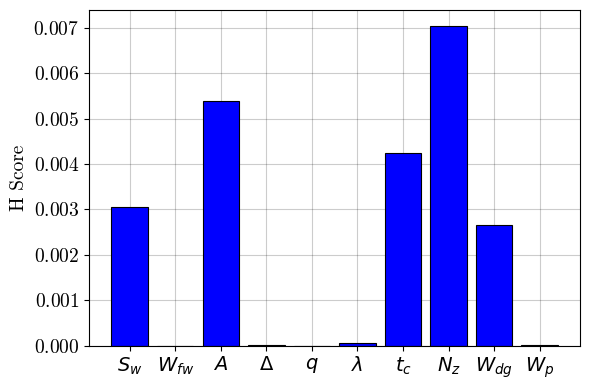

In [5]:
%%time
model = kriging_model

overall_pd_interaction = PDFeatureInteractionDisplay.overall_interaction(
    model,
    X_tr,
    feature_names=feature_names, 
)

CPU times: user 48.3 s, sys: 27.5 s, total: 1min 15s
Wall time: 10.4 s


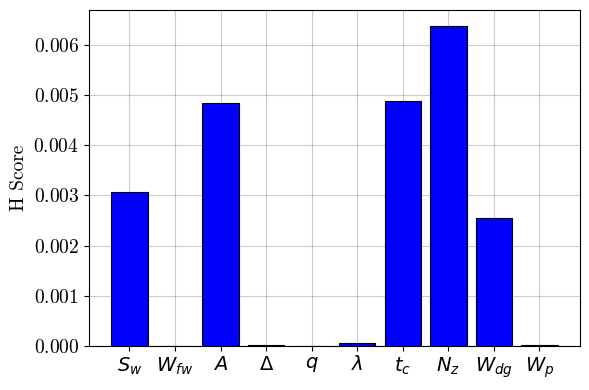

In [6]:
%%time
model = kriging_model

overall_pd_interaction = PDFeatureInteractionDisplay.overall_interaction(
    model,
    X_tr,
    feature_names=feature_names, 
    ratio_samples=0.5,
)

### Pairwise interaction

Using `PDFeatureInteractionDisplay.pairwise_interaction` method. 
- Required parameters:
    - model: surrogate model.
    - X: input spaces as a reference to compute the interaction. 
    - feature_pairs: pair of features to compute the interaction

- Config parameters:
    - categorical_features: list of categorical features index. this is crucial for the computation.
    - feature_names: name of the features for the axis. 
    - ratio_samples: ratio of samples to be used for computing the feature interaction. 
    - sorted: if True, sort the features based on the feature importance. 



CPU times: user 4min 10s, sys: 2min 2s, total: 6min 12s
Wall time: 51 s


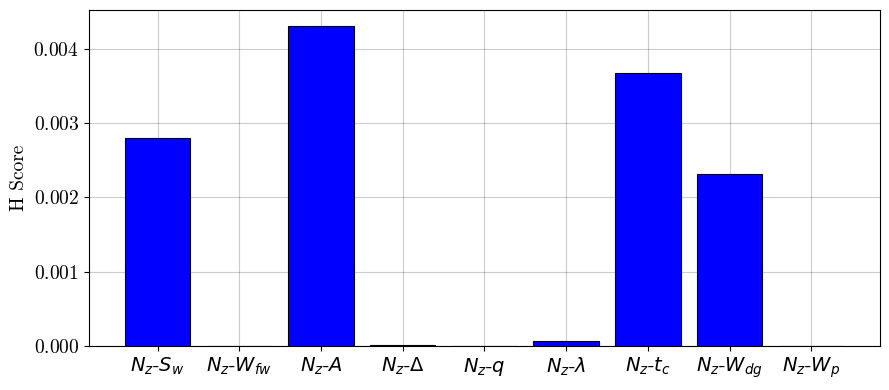

In [7]:
%%time
model = kriging_model
X = X_tr
features = [i for i in range(X_tr.shape[1])]
feature_i = 7
feature_pairs = [
    (feature_i, feature_j) for feature_j in features if feature_j != feature_i
]

pairwise_pd_interaction = PDFeatureInteractionDisplay.pairwise_interaction(
    model,
    X,
    feature_pairs,
    feature_names=feature_names,
)

CPU times: user 54.1 s, sys: 36.9 s, total: 1min 30s
Wall time: 12.1 s


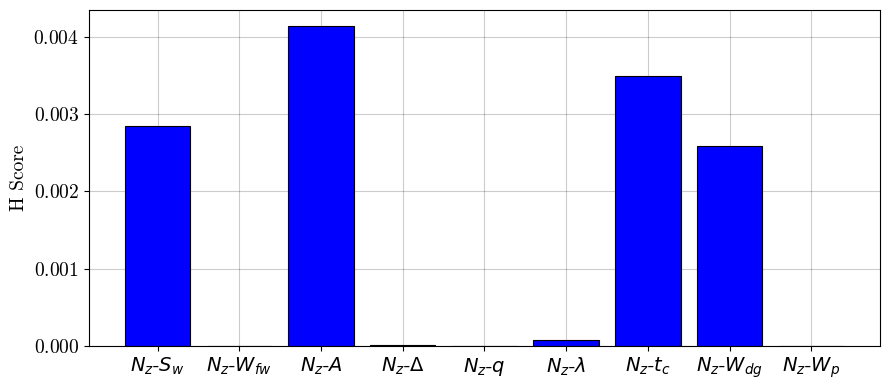

In [8]:
%%time
model = kriging_model
X = X_tr
features = [i for i in range(X_tr.shape[1])]
feature_i = 7
feature_pairs = [
    (feature_i, feature_j) for feature_j in features if feature_j != feature_i
]

pairwise_pd_interaction = PDFeatureInteractionDisplay.pairwise_interaction(
    model,
    X,
    feature_pairs,
    feature_names=feature_names,
    ratio_samples=0.5, 
)

## 1 Dimension

Using `PartialDependenceDisplay.from_surrogate_model` method
- Required parameters:
    - model: surrogate model. 
    - X: input spaces as a reference to create the partial dependence plot. 
    - features: list of feature indexes to create the partial dependence plot on, i.e., y vs x_{i}.

- Config parameters:
    - kind: "average" for creating average dependence plot, "individual" for creating individual plots, "both" for plotting average and individual.
    - centered: if True, the partial dependence plot starts from zero. 
    - grid_resolution: Resolution of the feature values. 
    - feature_names: name of the features for the axis. 
    - percentiles: start and end percentile of each feature when creating the plot. 


CPU times: user 34.5 s, sys: 30 s, total: 1min 4s
Wall time: 9.99 s


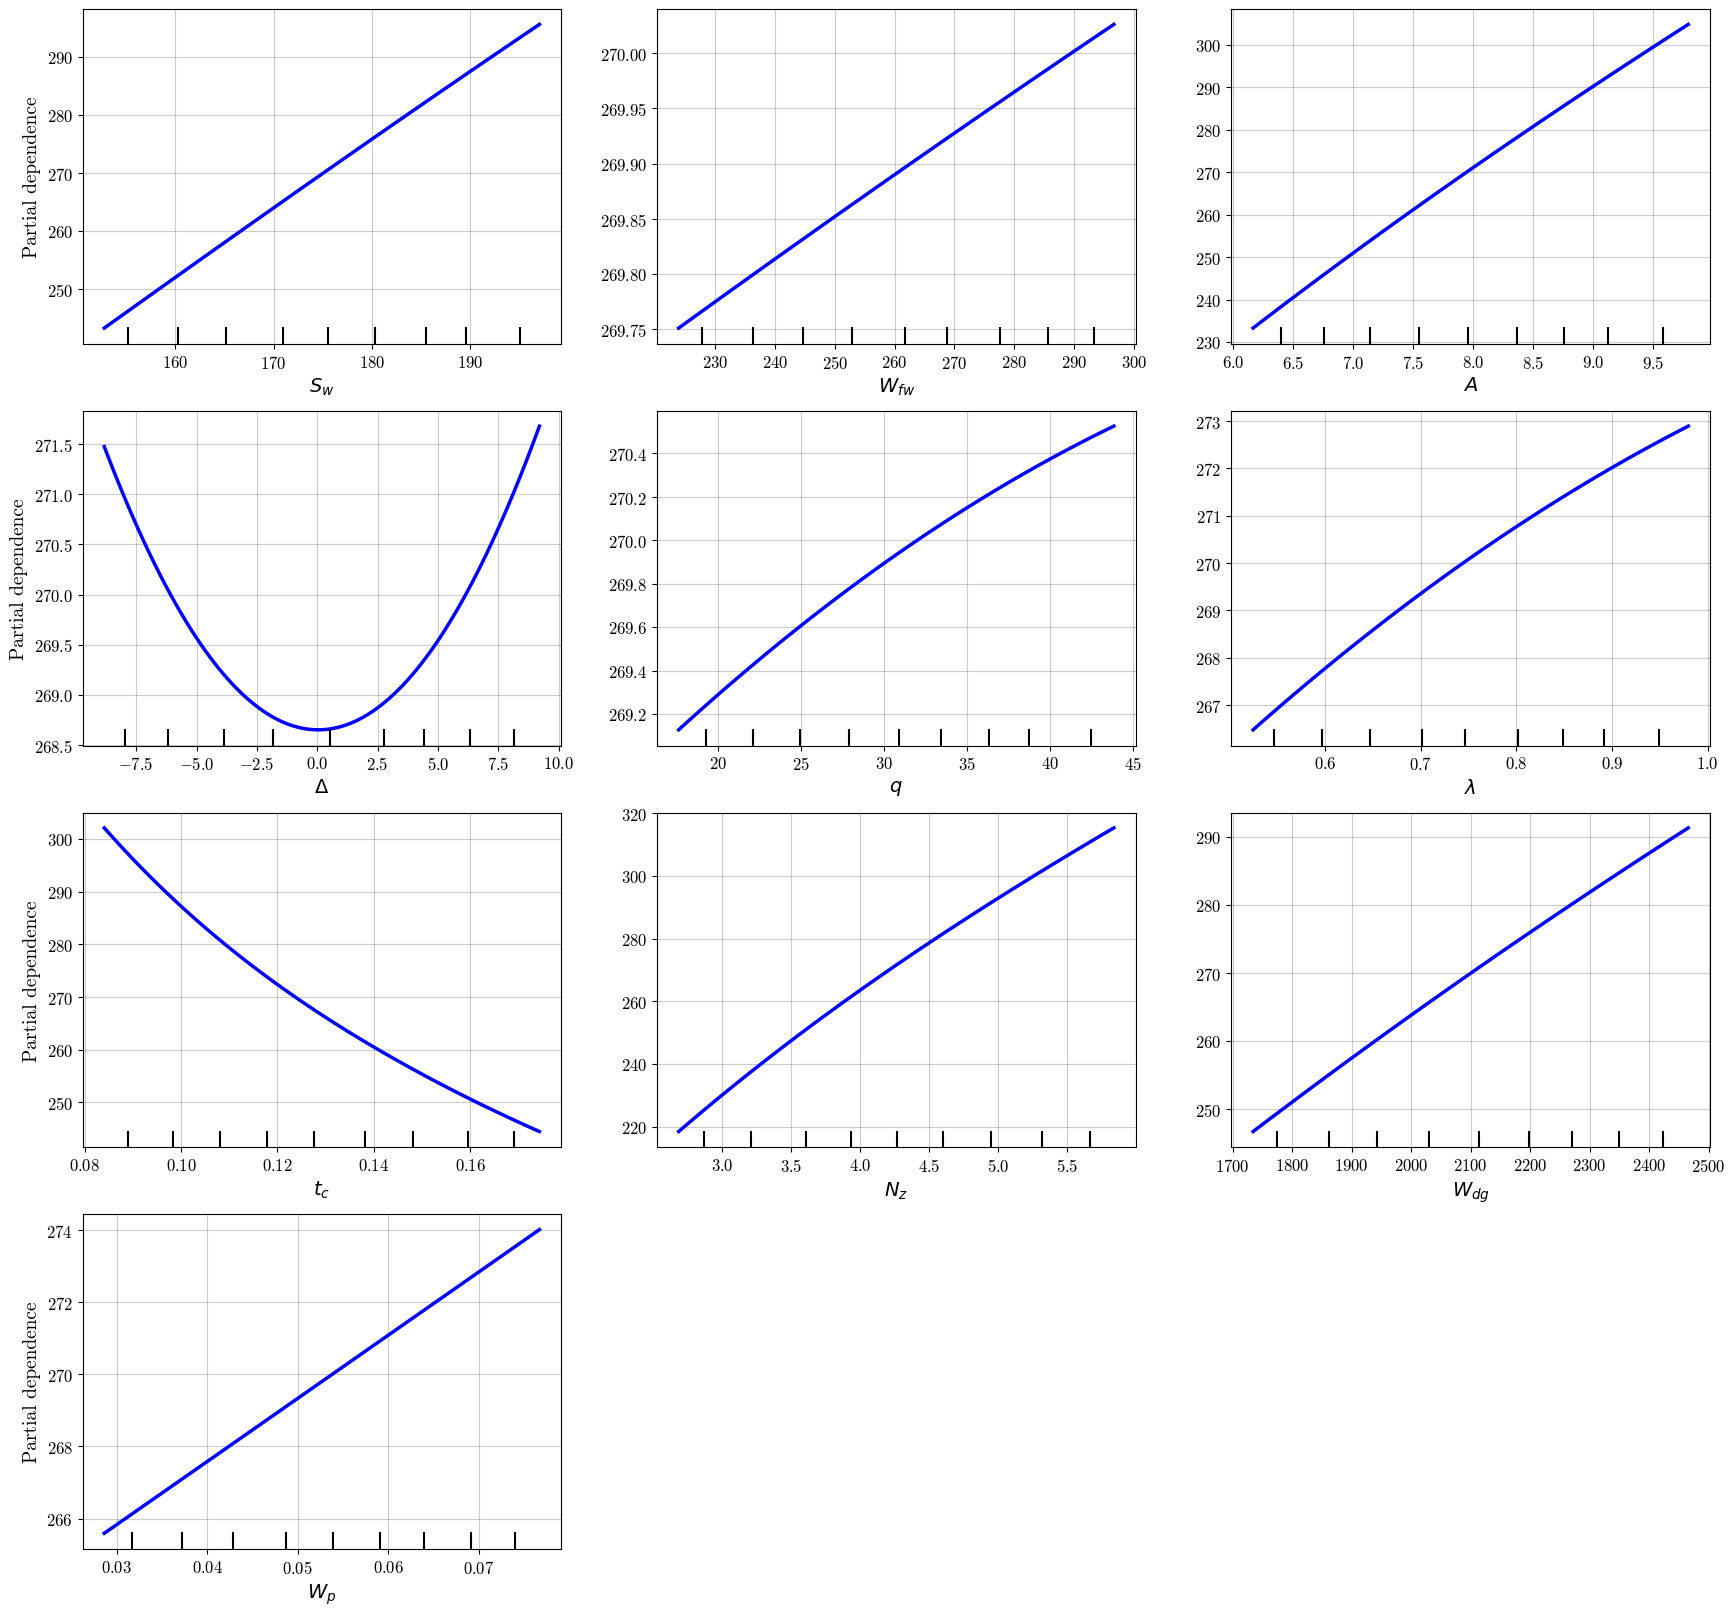

In [9]:
%%time
model = kriging_model
X = X_tr
features = [i for i in range(X_tr.shape[1])]

pdd = PartialDependenceDisplay.from_surrogate_model(
    model, 
    X, 
    features, 
    grid_resolution=100, 
    kind='average',
    feature_names=feature_names,
    centered=False
    )

CPU times: user 45.7 s, sys: 24.4 s, total: 1min 10s
Wall time: 11.2 s


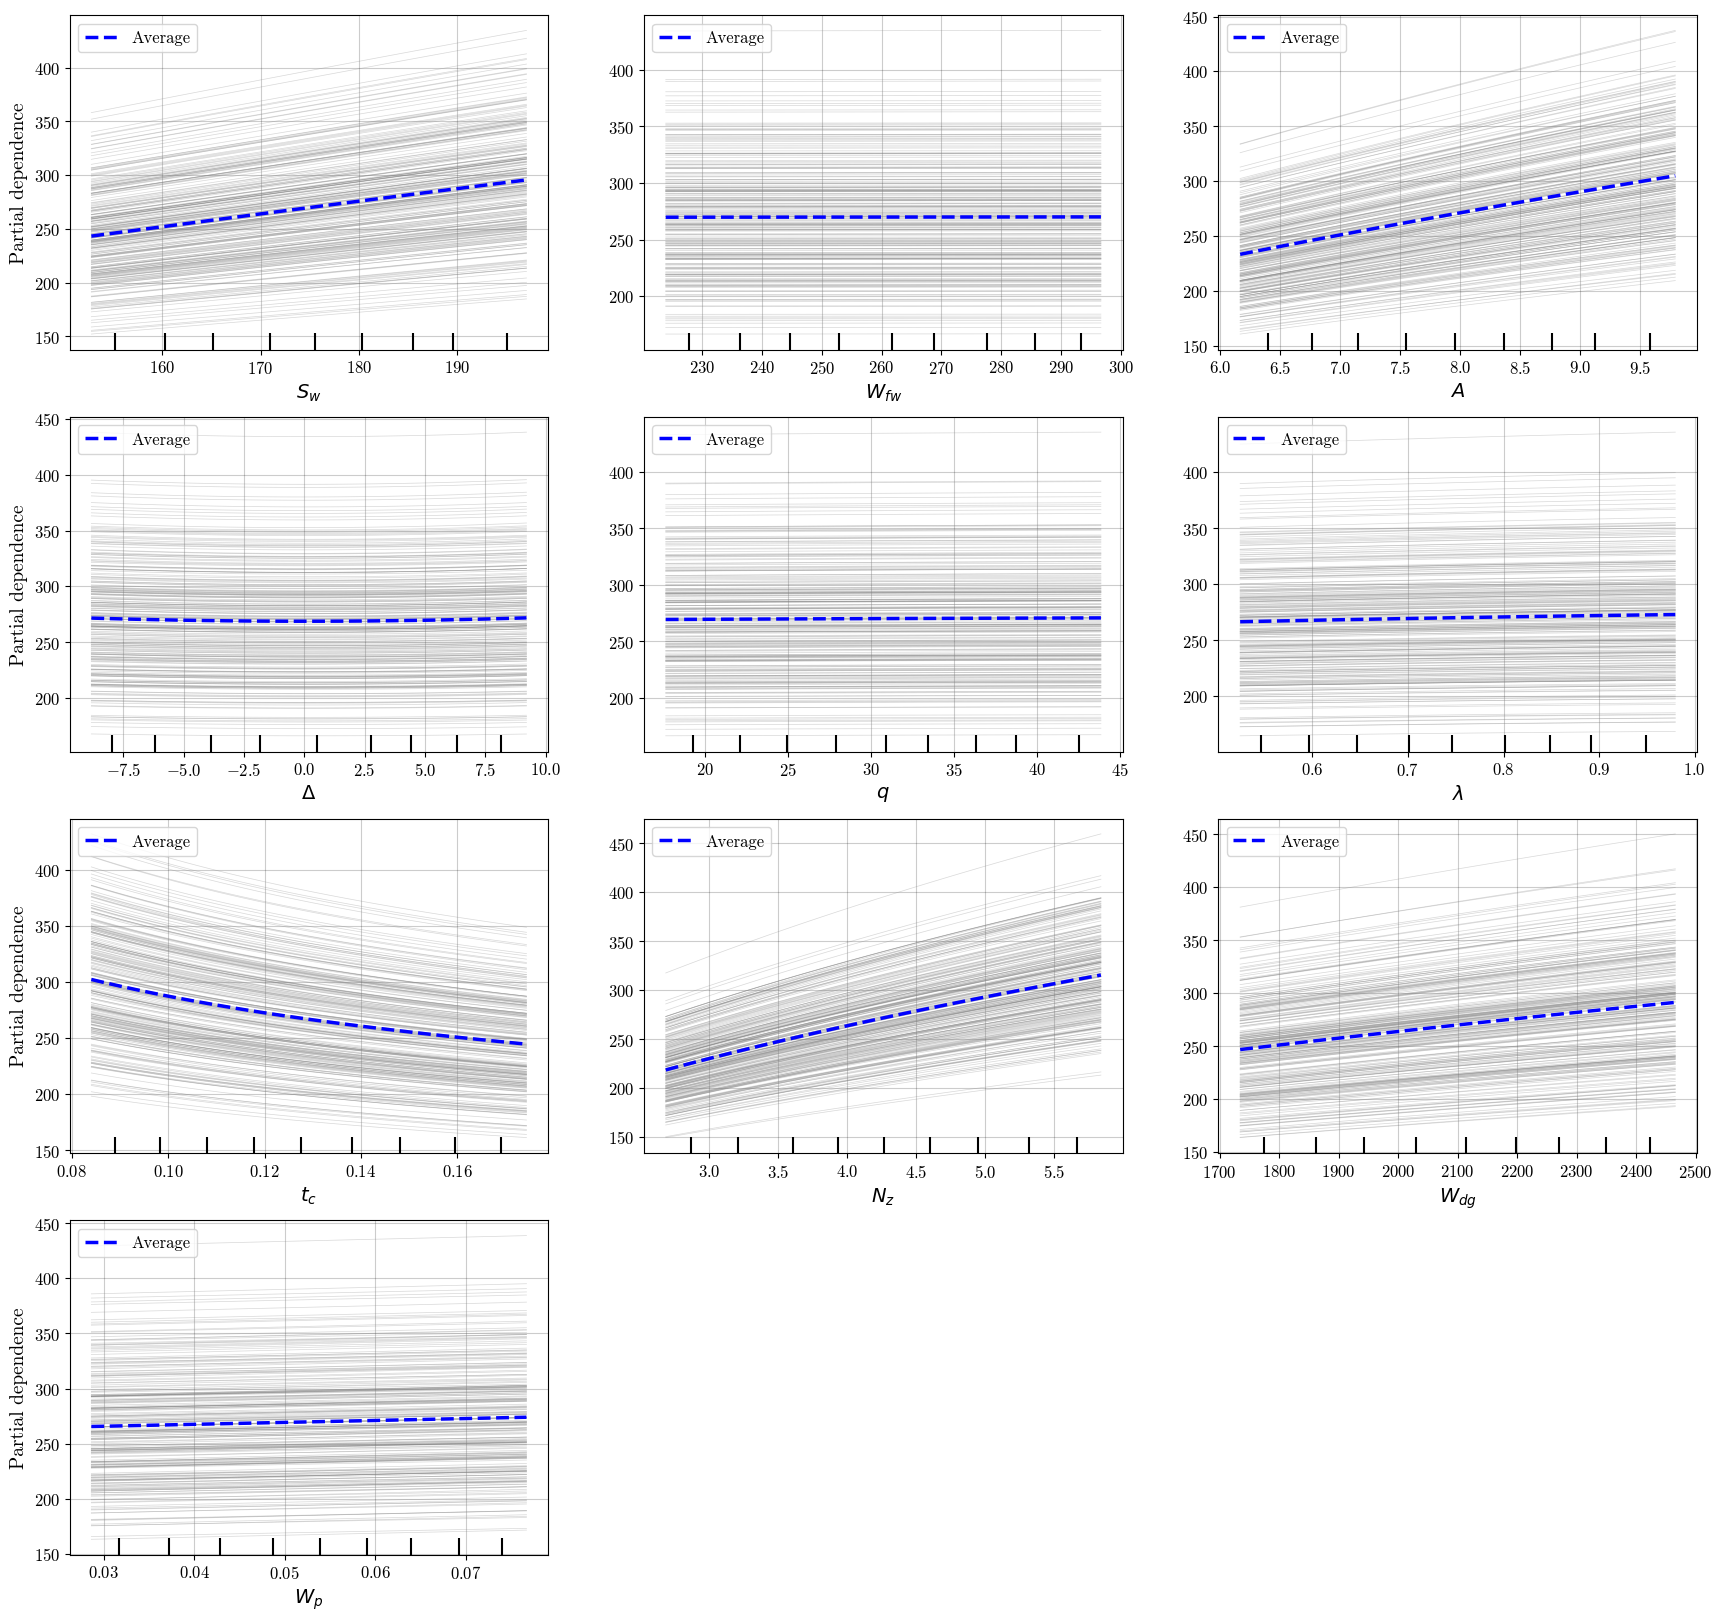

In [10]:
%%time
model = kriging_model
X = X_tr
features = [i for i in range(X_tr.shape[1])]

pdd = PartialDependenceDisplay.from_surrogate_model(
    model, 
    X, 
    features, 
    grid_resolution=100, 
    kind='both', 
    feature_names=feature_names,
    centered=False
    )

CPU times: user 38.4 s, sys: 22.4 s, total: 1min
Wall time: 9.29 s


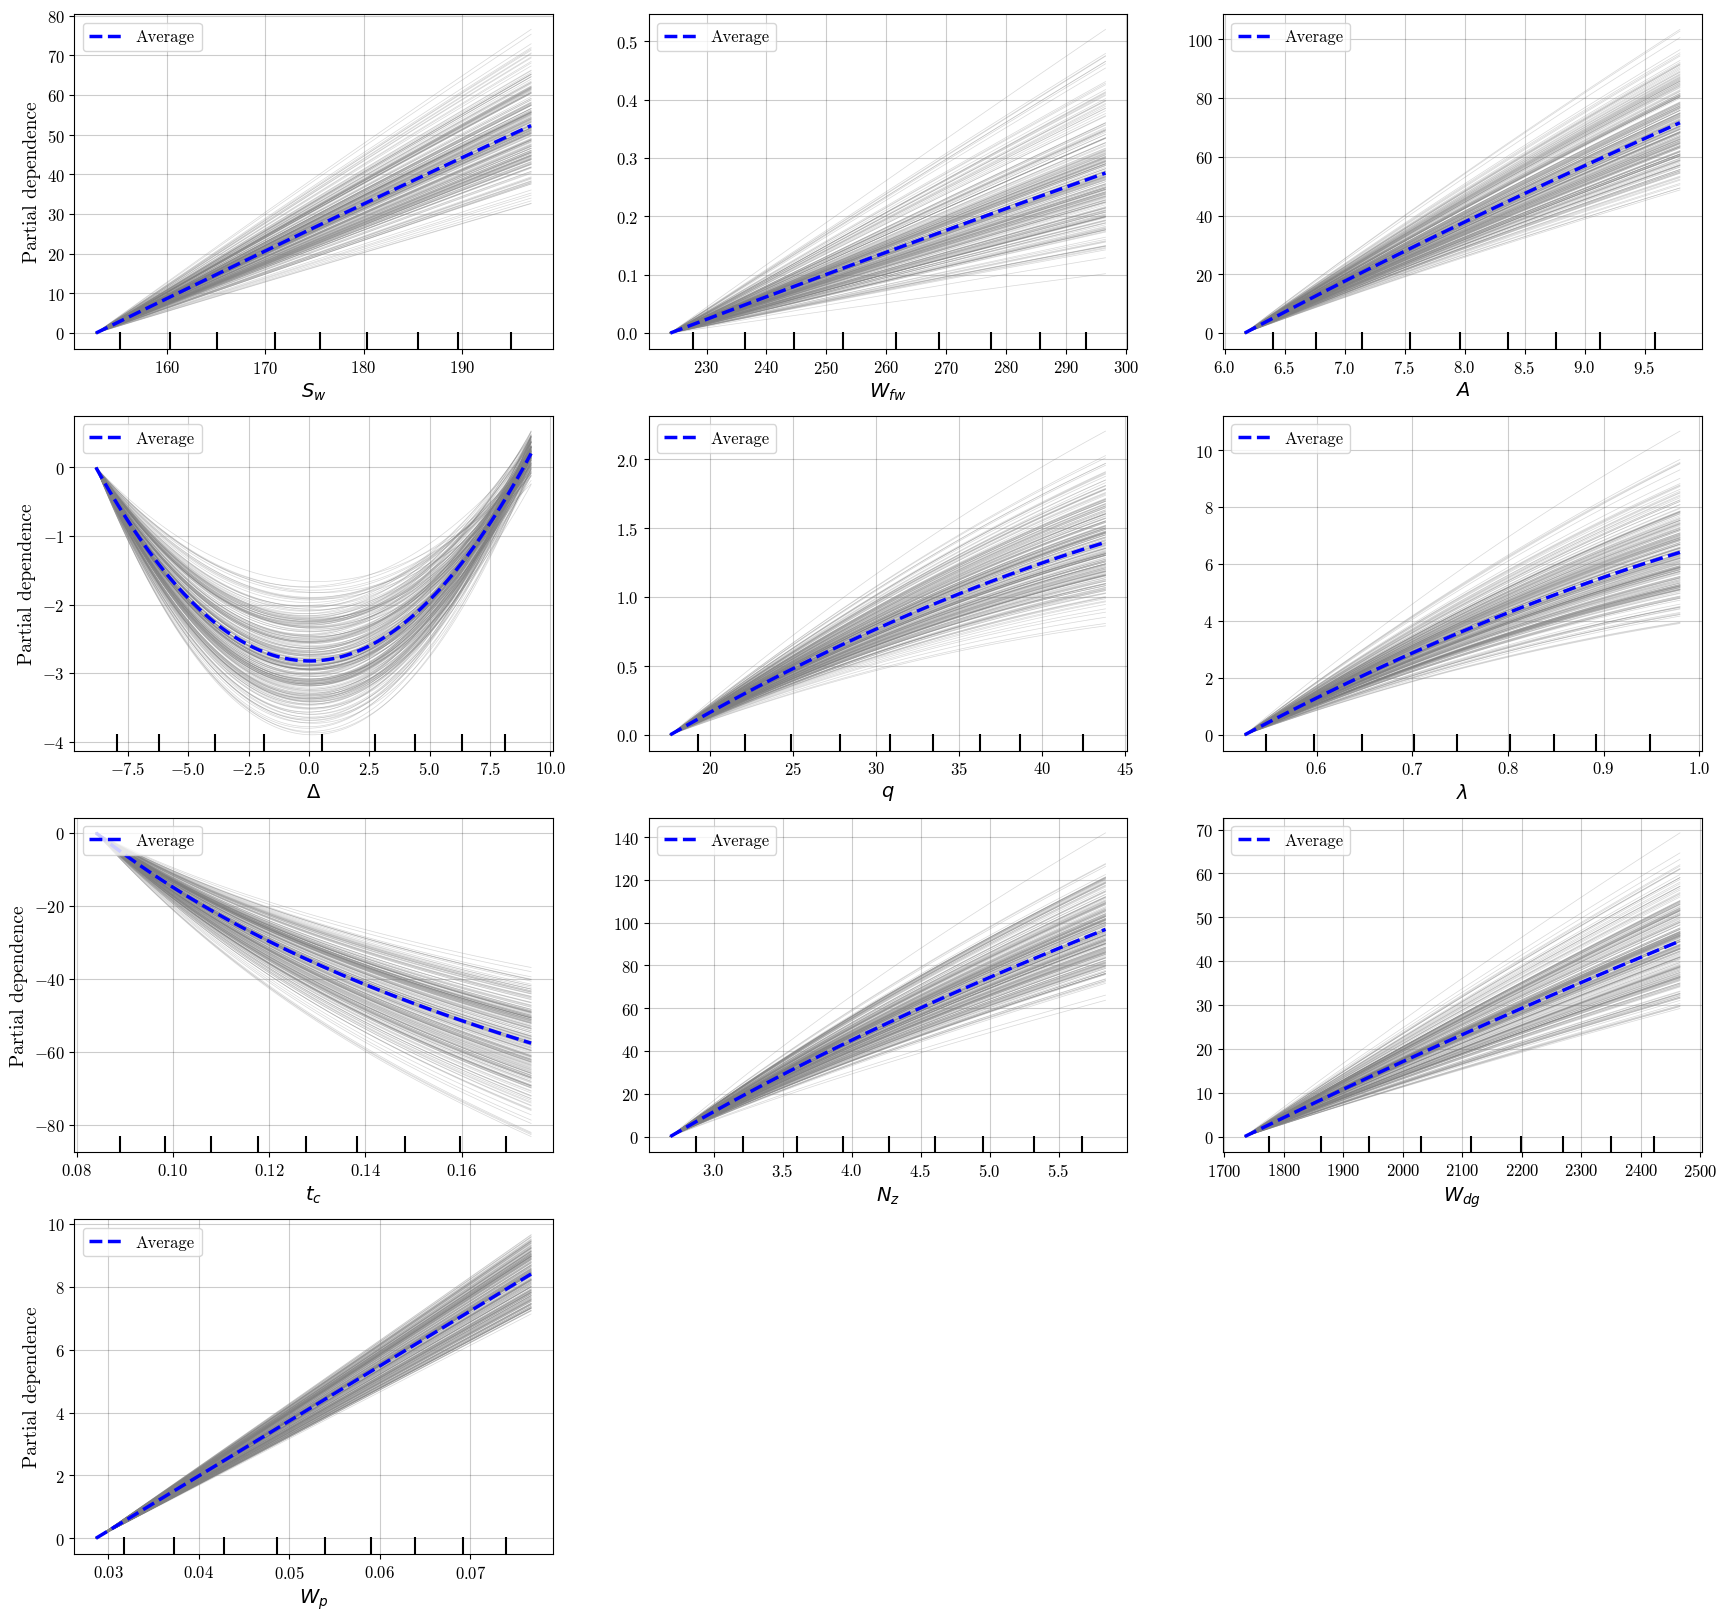

In [11]:
%%time
model = kriging_model
X = X_tr
features = [i for i in range(X_tr.shape[1])]

pdd = PartialDependenceDisplay.from_surrogate_model(
    model, 
    X, 
    features, 
    grid_resolution=100, 
    kind='both', 
    feature_names=feature_names,
    centered=True
    )

## 2 Dimension

Using `PartialDependenceDisplay.from_surrogate_model` method
- Required parameters:
    - model: surrogate model. 
    - X: input spaces as a reference to create the partial dependence plot. 
    - features: list of feature index pairs to create the partial dependence plot on, i.e., y vs (x_{i}, x_{j})

- Config parameters:
    - centered: if True, the partial dependence plot starts from zero. 
    - grid_resolution: Resolution of the feature values. 
    - feature_names: name of the features for the axis. 
    - percentiles: start and end percentile of each feature when creating the plot. 

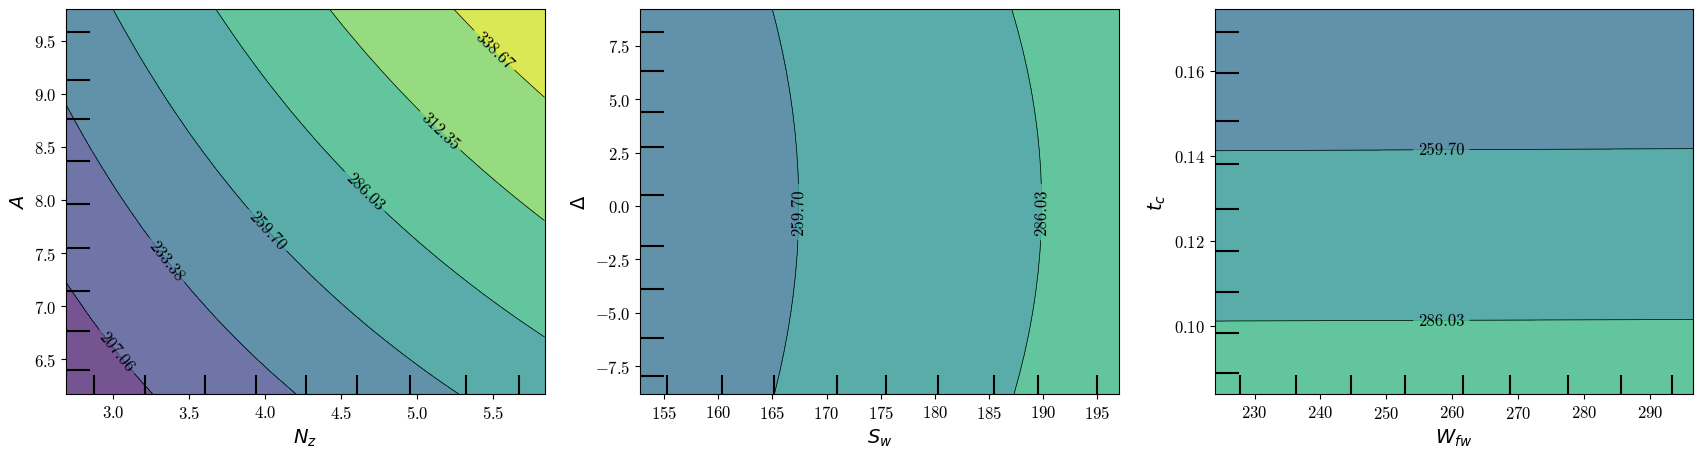

In [12]:
model = kriging_model
X = X_tr
features = [(7, 2), (0, 3), (1, 6)]

pdd = PartialDependenceDisplay.from_surrogate_model(
    model, 
    X, 
    features, 
    grid_resolution=20, 
    kind='average', 
    feature_names=feature_names,
    centered=False
    )

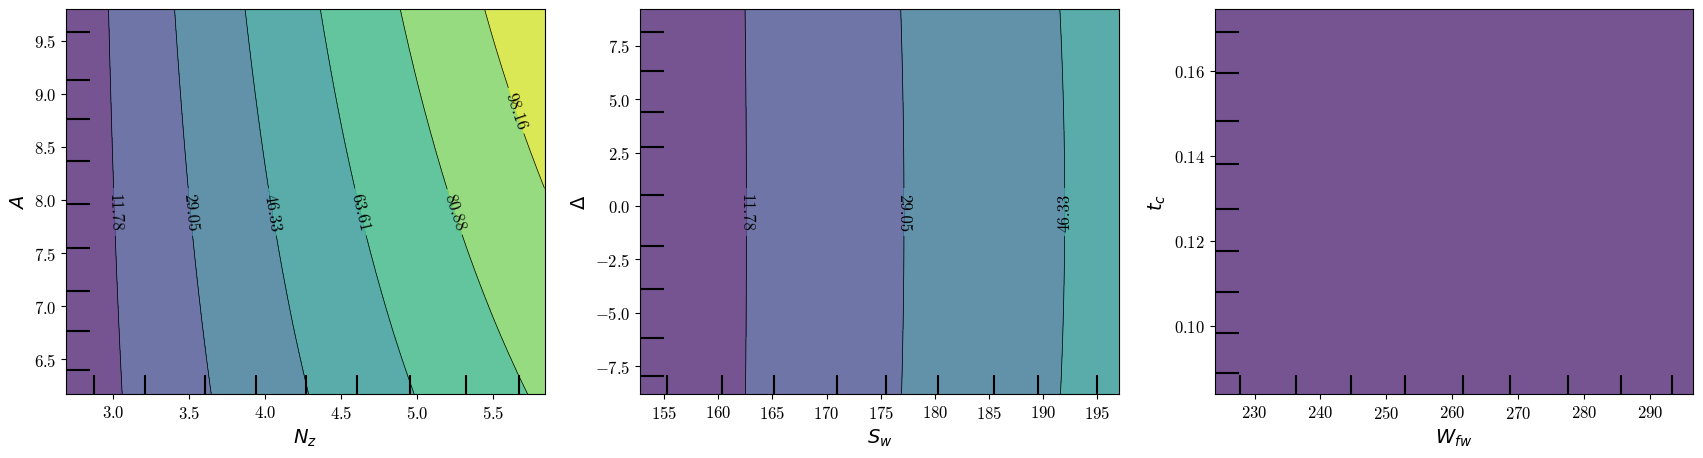

In [13]:
model = kriging_model
X = X_tr
features = [(7, 2), (0, 3), (1, 6)]

pdd = PartialDependenceDisplay.from_surrogate_model(
    model, 
    X, 
    features, 
    grid_resolution=20, 
    kind='average', 
    feature_names=feature_names,
    centered=True,
    )